In [1]:
%pylab inline
import numpy as np
import pandas as pd
from scipy.stats import binned_statistic_2d

Populating the interactive namespace from numpy and matplotlib


In [2]:
# загрузка майских значений и регионов:

may_2016 = pd.read_csv('yellow_tripdata_2016-05.csv')
# may_2016_1 = pd.read_csv('yellow_tripdata_2016-04-1.csv')

In [3]:
regions = pd.read_csv('regions.csv', delimiter=';')

In [4]:
regions.head()

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


In [5]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   region  2500 non-null   int64  
 1   west    2500 non-null   float64
 2   east    2500 non-null   float64
 3   south   2500 non-null   float64
 4   north   2500 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 97.8 KB


In [6]:
regions.describe()

,region,west,east,south,north
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1250.50000,-73.983356,-73.972244,40.701631,40.710019
std,721.83216,0.160382,0.160382,0.121073,0.121073
min,1.00000,-74.255590,-74.244478,40.496120,40.504508
25%,625.75000,-74.122251,-74.111139,40.596778,40.605167
50%,1250.50000,-73.983356,-73.972244,40.701631,40.710019
75%,1875.25000,-73.844461,-73.833349,40.806483,40.814872
max,2500.00000,-73.711122,-73.700010,40.907142,40.915530


In [7]:
may_2016.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76
5,2,2016-05-01 00:00:00,2016-05-01 00:05:19,2,0.63,-73.979294,40.755764,1,N,-73.988014,40.758469,1,5.0,0.5,0.5,0.00,0.0,0.3,6.30
6,2,2016-05-01 00:00:00,2016-05-01 00:15:43,1,6.68,-73.981544,40.780739,1,N,-73.937805,40.855343,1,20.5,0.5,0.5,2.00,0.0,0.3,23.80
7,2,2016-05-01 00:00:00,2016-05-01 00:06:31,1,1.48,-73.987198,40.750507,1,N,-73.980797,40.767826,1,7.0,0.5,0.5,1.66,0.0,0.3,9.96
8,2,2016-05-01 00:00:00,2016-05-01 00:00:00,4,1.59,-74.001610,40.740990,1,N,-73.981079,40.730675,1,8.0,0.5,0.5,0.00,0.0,0.3,9.30
9,2,2016-05-01 00:00:00,2016-05-01 00:00:00,3,3.52,-74.013855,40.714119,1,N,-73.994049,40.761452,2,13.0,0.5,0.5,0.00,0.0,0.3,14.30


In [8]:
# may_2016_1

In [9]:
may_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11836853 entries, 0 to 11836852
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RatecodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.7+ GB


In [10]:
may_2016.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07
mean,1.529075e+00,1.662265e+00,6.110069e+00,-7.304978e+01,4.024234e+01,1.045014e+00,-7.311869e+01,4.028127e+01,1.349840e+00,1.334066e+01,3.291893e-01,4.972577e-01,1.831982e+00,3.422044e-01,2.996838e-01,1.664095e+01
std,4.991539e-01,1.304418e+00,5.155162e+03,8.212003e+00,4.523904e+00,6.203209e-01,7.902544e+00,4.353644e+00,4.942504e-01,1.188799e+01,4.585669e-01,4.473578e-02,2.665043e+00,1.760303e+00,1.300760e-02,1.450379e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,-1.650819e+02,-4.456935e+01,1.000000e+00,-1.295732e+02,0.000000e+00,1.000000e+00,-4.100000e+02,-3.900000e+01,-2.700000e+00,-8.000000e+01,-1.500000e+01,-3.000000e-01,-4.103000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399179e+01,4.073611e+01,1.000000e+00,-7.399116e+01,4.073457e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.760000e+00
50%,2.000000e+00,1.000000e+00,1.720000e+00,-7.398136e+01,4.075375e+01,1.000000e+00,-7.397922e+01,4.075439e+01,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.260000e+00,0.000000e+00,3.000000e-01,1.230000e+01
75%,2.000000e+00,2.000000e+00,3.270000e+00,-7.396588e+01,4.076862e+01,1.000000e+00,-7.396164e+01,4.077012e+01,2.000000e+00,1.500000e+01,5.000000e-01,5.000000e-01,2.450000e+00,0.000000e+00,3.000000e-01,1.836000e+01
max,2.000000e+00,9.000000e+00,1.200000e+07,1.184089e+02,5.366724e+01,9.900000e+01,0.000000e+00,7.012994e+01,5.000000e+00,8.007000e+03,7.900000e+01,4.030000e+01,7.500000e+02,1.120680e+03,3.100000e+00,8.007800e+03


In [11]:
# черновая проверка на пустые значения:
may_2016.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [12]:
# Очистка от аномальных и не попадающих под условия задачи значений:

indexNames = may_2016[(may_2016['trip_distance'] == 0) | (may_2016['passenger_count'] == 0)
                      | (may_2016['pickup_longitude'] < -74.25559) | (may_2016['pickup_longitude'] > -73.70001) 
                      | (may_2016['pickup_latitude'] < 40.49612) | (may_2016['pickup_latitude'] > 40.91553)].index
may_2016.drop(indexNames , inplace=True)

In [13]:
may_2016

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11836837,2,2016-05-31 23:53:01,2016-06-01 00:00:24,2,1.89,-73.947876,40.774818,1,N,-73.974274,40.779797,1,8.0,0.5,0.5,1.86,0.0,0.3,11.16
11836838,2,2016-05-31 23:53:02,2016-06-01 00:19:36,1,15.21,-73.789467,40.646942,1,N,-73.893929,40.731426,1,42.0,0.5,0.5,8.66,0.0,0.3,51.96
11836839,2,2016-05-31 23:53:02,2016-05-31 23:59:07,1,1.80,-74.008659,40.719723,1,N,-73.999580,40.743649,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56
11836840,2,2016-05-31 23:53:03,2016-06-01 00:05:47,1,2.28,-73.981644,40.758862,1,N,-73.952637,40.766491,1,11.0,0.5,0.5,2.46,0.0,0.3,14.76


In [14]:
# Выявление аномальных поездок с нулевой длительнотью по времени (и отрицательной)

may_2016[['tpep_pickup_datetime', 'tpep_dropoff_datetime']] = may_2016[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].apply(pd.to_datetime)
may_2016['delta_tpep_datetime'] = may_2016['tpep_dropoff_datetime'] - may_2016['tpep_pickup_datetime']

In [15]:
indexNames = may_2016[(may_2016['delta_tpep_datetime'] <= '00:00:00')].index
may_2016.drop(indexNames , inplace=True)

In [16]:
may_2016

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,delta_tpep_datetime
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80,00:17:31
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68,00:07:31
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,00:07:01
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96,00:19:47
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76,00:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11836837,2,2016-05-31 23:53:01,2016-06-01 00:00:24,2,1.89,-73.947876,40.774818,1,N,-73.974274,40.779797,1,8.0,0.5,0.5,1.86,0.0,0.3,11.16,00:07:23
11836838,2,2016-05-31 23:53:02,2016-06-01 00:19:36,1,15.21,-73.789467,40.646942,1,N,-73.893929,40.731426,1,42.0,0.5,0.5,8.66,0.0,0.3,51.96,00:26:34
11836839,2,2016-05-31 23:53:02,2016-05-31 23:59:07,1,1.80,-74.008659,40.719723,1,N,-73.999580,40.743649,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,00:06:05
11836840,2,2016-05-31 23:53:03,2016-06-01 00:05:47,1,2.28,-73.981644,40.758862,1,N,-73.952637,40.766491,1,11.0,0.5,0.5,2.46,0.0,0.3,14.76,00:12:44


In [17]:
may_2016.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,delta_tpep_datetime
count,1.162652e+07,1.162652e+07,1.162652e+07,1.162652e+07,1.162652e+07,1.162652e+07,1.162652e+07,1.162652e+07,1.162652e+07,1.162652e+07,1.162652e+07,1.162652e+07,1.162652e+07,1.162652e+07,1.162652e+07,1.162652e+07,11626521
mean,1.532216e+00,1.665547e+00,6.183120e+00,-7.397297e+01,4.075091e+01,1.035855e+00,-7.394901e+01,4.073869e+01,1.346877e+00,1.329009e+01,3.293084e-01,4.979773e-01,1.827028e+00,3.411761e-01,2.998080e-01,1.658536e+01,0 days 00:16:50.139341
std,4.989611e-01,1.307689e+00,5.201581e+03,3.891102e-02,2.853368e-02,3.893456e-01,1.328789e+00,7.327153e-01,4.908161e-01,1.112288e+01,4.467856e-01,3.449482e-02,2.573152e+00,1.713772e+00,1.067103e-02,1.381537e+01,0 days 00:54:46.353581
min,1.000000e+00,1.000000e+00,1.000000e-02,-7.425517e+01,4.051407e+01,1.000000e+00,-9.521244e+01,0.000000e+00,1.000000e+00,-2.750000e+02,-4.500000e+00,-5.000000e-01,-8.000000e+01,-1.500000e+01,-3.000000e-01,-2.753000e+02,0 days 00:00:01
25%,1.000000e+00,1.000000e+00,1.020000e+00,-7.399193e+01,4.073718e+01,1.000000e+00,-7.399126e+01,4.073568e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.760000e+00,0 days 00:06:51
50%,2.000000e+00,1.000000e+00,1.750000e+00,-7.398161e+01,4.075435e+01,1.000000e+00,-7.397950e+01,4.075484e+01,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.320000e+00,0.000000e+00,3.000000e-01,1.230000e+01,0 days 00:11:31
75%,2.000000e+00,2.000000e+00,3.300000e+00,-7.396674e+01,4.076882e+01,1.000000e+00,-7.396247e+01,4.077037e+01,2.000000e+00,1.500000e+01,5.000000e-01,5.000000e-01,2.450000e+00,0.000000e+00,3.000000e-01,1.836000e+01,0 days 00:18:55
max,2.000000e+00,9.000000e+00,1.200000e+07,-7.370009e+01,4.091525e+01,9.900000e+01,0.000000e+00,7.012994e+01,5.000000e+00,9.520000e+02,7.900000e+01,1.635000e+01,6.500000e+02,1.120680e+03,3.000000e-01,1.173480e+03,7 days 00:13:26


In [18]:
may_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11626521 entries, 0 to 11836841
Data columns (total 20 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   VendorID               int64          
 1   tpep_pickup_datetime   datetime64[ns] 
 2   tpep_dropoff_datetime  datetime64[ns] 
 3   passenger_count        int64          
 4   trip_distance          float64        
 5   pickup_longitude       float64        
 6   pickup_latitude        float64        
 7   RatecodeID             int64          
 8   store_and_fwd_flag     object         
 9   dropoff_longitude      float64        
 10  dropoff_latitude       float64        
 11  payment_type           int64          
 12  fare_amount            float64        
 13  extra                  float64        
 14  mta_tax                float64        
 15  tip_amount             float64        
 16  tolls_amount           float64        
 17  improvement_surcharge  float64        
 18  

In [19]:
# Отбрасываем минуты и секунды во времени начала поездки
may_2016.tpep_pickup_datetime = may_2016.tpep_pickup_datetime.dt.floor("H")

In [20]:
may_2016.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,delta_tpep_datetime
0,1,2016-05-01,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80,00:17:31
1,2,2016-05-01,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68,00:07:31
2,2,2016-05-01,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,00:07:01
3,2,2016-05-01,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96,00:19:47
4,2,2016-05-01,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76,00:06:39


In [21]:
# Формирование 2500 областей:

# xbins = np.linspace(-74.25559, -73.70001, num=51)
# ybins = np.linspace(40.49612, 40.91553, num=51)

In [22]:
range_1 = [[-74.25559, -73.70001], [40.49612, 40.91553]]

In [23]:
ret = binned_statistic_2d(may_2016.pickup_longitude, may_2016.pickup_latitude, may_2016.VendorID, 'count', bins=[50, 50], expand_binnumbers=True, range=range_1)

In [24]:
# ret_1 = binned_statistic_2d(may_2016_1.pickup_longitude, may_2016_1.pickup_latitude, may_2016_1.VendorID, 'count', bins=[50, 50], expand_binnumbers=True, range=range_1)

In [25]:
len(ret.statistic)

50

In [26]:
ret.statistic

array([[0., 0., 0., ..., 0., 5., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
ret.binnumber

array([[25, 24, 24, ..., 23, 25, 28],
       [33, 30, 30, ..., 27, 32, 11]], dtype=int64)

In [28]:
# ret_1.binnumber

In [29]:
ret.x_edge

array([-74.25559  , -74.2444784, -74.2333668, -74.2222552, -74.2111436,
       -74.200032 , -74.1889204, -74.1778088, -74.1666972, -74.1555856,
       -74.144474 , -74.1333624, -74.1222508, -74.1111392, -74.1000276,
       -74.088916 , -74.0778044, -74.0666928, -74.0555812, -74.0444696,
       -74.033358 , -74.0222464, -74.0111348, -74.0000232, -73.9889116,
       -73.9778   , -73.9666884, -73.9555768, -73.9444652, -73.9333536,
       -73.922242 , -73.9111304, -73.9000188, -73.8889072, -73.8777956,
       -73.866684 , -73.8555724, -73.8444608, -73.8333492, -73.8222376,
       -73.811126 , -73.8000144, -73.7889028, -73.7777912, -73.7666796,
       -73.755568 , -73.7444564, -73.7333448, -73.7222332, -73.7111216,
       -73.70001  ])

In [30]:
len(ret.x_edge)

51

In [31]:
ret[3]

array([[25, 24, 24, ..., 23, 25, 28],
       [33, 30, 30, ..., 27, 32, 11]], dtype=int64)

In [32]:
# Перевод в одномерную сетку

may_2016['region'] = (ret[3][0] - 1) * 50 + ret[3][1]

In [33]:
# may_2016_1['region'] = (ret_1[3][0] - 1) * 50 + ret_1[3][1]

In [34]:
may_2016['region'].max()

2487

In [35]:
# Количество задействованных регионов из 2500 в мае:
len(np.unique(sorted(may_2016['region'], reverse=True)))

1217

In [36]:
regions[regions['region']==1231]    # ESB:   40.748306° N,   73.985756° W

,region,west,east,south,north
1230,1231,-73.988912,-73.9778,40.747766,40.756154


In [37]:
may_2016

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,delta_tpep_datetime,region
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,...,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80,00:17:31,1233
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,...,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68,00:07:31,1180
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,...,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,00:07:01,1180
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,...,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96,00:19:47,1173
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,...,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76,00:06:39,1130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11836837,2,2016-05-31 23:00:00,2016-06-01 00:00:24,2,1.89,-73.947876,40.774818,1,N,-73.974274,...,1,8.0,0.5,0.5,1.86,0.0,0.3,11.16,00:07:23,1384
11836838,2,2016-05-31 23:00:00,2016-06-01 00:19:36,1,15.21,-73.789467,40.646942,1,N,-73.893929,...,1,42.0,0.5,0.5,8.66,0.0,0.3,51.96,00:26:34,2068
11836839,2,2016-05-31 23:00:00,2016-05-31 23:59:07,1,1.80,-74.008659,40.719723,1,N,-73.999580,...,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,00:06:05,1127
11836840,2,2016-05-31 23:00:00,2016-06-01 00:05:47,1,2.28,-73.981644,40.758862,1,N,-73.952637,...,1,11.0,0.5,0.5,2.46,0.0,0.3,14.76,00:12:44,1232


In [56]:
# 3. Агрегированные данные за май 2016 года по часам (по горизонтали) и областям (по вертикали)

aggr = may_2016.pivot_table(index=['region'], columns='tpep_pickup_datetime', values='RatecodeID', aggfunc='count', dropna=True, fill_value=0)

In [57]:
aggr

tpep_pickup_datetime,2016-05-01 00:00:00,2016-05-01 01:00:00,2016-05-01 02:00:00,2016-05-01 03:00:00,2016-05-01 04:00:00,2016-05-01 05:00:00,2016-05-01 06:00:00,2016-05-01 07:00:00,2016-05-01 08:00:00,2016-05-01 09:00:00,...,2016-05-31 14:00:00,2016-05-31 15:00:00,2016-05-31 16:00:00,2016-05-31 17:00:00,2016-05-31 18:00:00,2016-05-31 19:00:00,2016-05-31 20:00:00,2016-05-31 21:00:00,2016-05-31 22:00:00,2016-05-31 23:00:00
region,,,,,,,,,,,,,,,,,,,,,
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# Запись данных для 2ой недели работы:
aggr.to_csv('may_2016_aggr.csv')

In [41]:
aggr[:14]

tpep_pickup_datetime,2016-05-01 00:00:00,2016-05-01 01:00:00,2016-05-01 02:00:00,2016-05-01 03:00:00,2016-05-01 04:00:00,2016-05-01 05:00:00,2016-05-01 06:00:00,2016-05-01 07:00:00,2016-05-01 08:00:00,2016-05-01 09:00:00,...,2016-05-31 14:00:00,2016-05-31 15:00:00,2016-05-31 16:00:00,2016-05-31 17:00:00,2016-05-31 18:00:00,2016-05-31 19:00:00,2016-05-31 20:00:00,2016-05-31 21:00:00,2016-05-31 22:00:00,2016-05-31 23:00:00
region,,,,,,,,,,,,,,,,,,,,,
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
aggr.describe()

tpep_pickup_datetime,2016-05-01 00:00:00,2016-05-01 01:00:00,2016-05-01 02:00:00,2016-05-01 03:00:00,2016-05-01 04:00:00,2016-05-01 05:00:00,2016-05-01 06:00:00,2016-05-01 07:00:00,2016-05-01 08:00:00,2016-05-01 09:00:00,...,2016-05-31 14:00:00,2016-05-31 15:00:00,2016-05-31 16:00:00,2016-05-31 17:00:00,2016-05-31 18:00:00,2016-05-31 19:00:00,2016-05-31 20:00:00,2016-05-31 21:00:00,2016-05-31 22:00:00,2016-05-31 23:00:00
count,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.00000,...,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000
mean,19.709121,17.118324,14.465078,10.933443,6.791290,2.900575,3.277732,4.580937,7.020542,10.48562,...,15.227609,14.942482,12.894823,15.592440,18.491372,17.146261,16.058340,15.892358,14.145440,10.041085
std,119.111234,114.181048,103.299214,79.515596,44.493781,16.420336,16.744454,23.747893,36.639429,55.60997,...,90.077689,87.337669,74.623080,92.757598,115.180073,108.084990,100.347131,100.288166,87.498662,59.983536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1334.000000,1420.000000,1372.000000,1250.000000,701.000000,230.000000,190.000000,266.000000,375.000000,585.00000,...,1409.000000,1266.000000,1026.000000,1389.000000,1885.000000,1909.000000,1694.000000,1492.000000,1365.000000,925.000000


In [43]:
# Построение графика количества поездок жёлтого такси из ячейки, содержащей Empire State Building

empire = aggr.loc[1231]
empire = empire.reset_index()

In [44]:
empire

,tpep_pickup_datetime,1231
0,2016-05-01 00:00:00,881
1,2016-05-01 01:00:00,713
2,2016-05-01 02:00:00,533
3,2016-05-01 03:00:00,418
4,2016-05-01 04:00:00,353
...,...,...
739,2016-05-31 19:00:00,1094
740,2016-05-31 20:00:00,997
741,2016-05-31 21:00:00,1099
742,2016-05-31 22:00:00,874


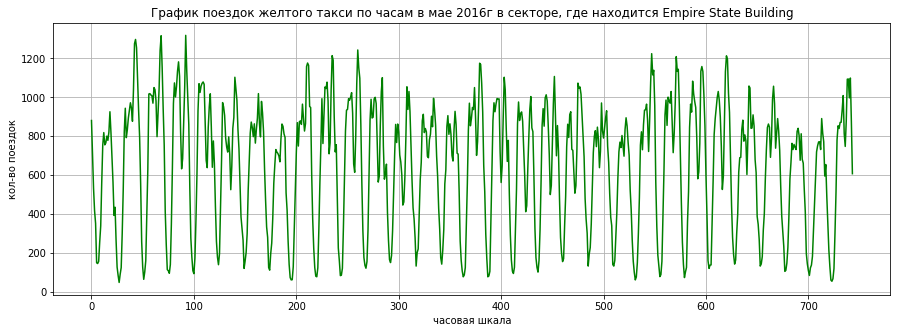

In [45]:
# график количества поездок жёлтого такси из ячейки, содержащей Empire State Building.
plt.figure(figsize(15, 5))
plt.plot(empire.index, empire.loc[:, 1231], color='g',)
plt.title('График поездок желтого такси по часам в мае 2016г в секторе, где находится Empire State Building')
pylab.xlabel('часовая шкала')
pylab.ylabel('кол-во поездок')

plt.grid(True)
plt.show()

In [46]:
empire.index

RangeIndex(start=0, stop=744, step=1)

In [47]:
aggr.isin([0]).sum()

tpep_pickup_datetime
2016-05-01 00:00:00     992
2016-05-01 01:00:00     995
2016-05-01 02:00:00     996
2016-05-01 03:00:00    1011
2016-05-01 04:00:00    1003
                       ... 
2016-05-31 19:00:00    1045
2016-05-31 20:00:00    1033
2016-05-31 21:00:00    1038
2016-05-31 22:00:00    1020
2016-05-31 23:00:00    1024
Length: 744, dtype: int64

In [48]:
# Подсчет, сколько в мае 2016 было пар час-ячейка, для которых не было совершено ни одной поездки
zero_re = aggr.isin([0]).sum().sum()

In [49]:
# Подсчет уже ранее отфильрованных пар час-ячейка (пустых) регионов:
zero_prev = (len(regions) - len(aggr))*24*31

In [50]:
# Итого всего пустых пар час-ячейка:
zero_all = zero_re + zero_prev
print(zero_all)

1718238


## О формате данных 
[Источник](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)